# Гришин Андрей Валерьевич, ИКБО-11-22.
## Практическая работа 5

# Задание 1
Найти данные для классификации. Данные в группе повторяться не
должны. Предобработать данные, если это необходимо.

In [33]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/Zoo.csv"
df = pd.read_csv(url)

df.head()

print(df.isnull().sum())

print(f"Всего записей: {df.shape[0]}")
print(f"Дубликатов: {df.duplicated().sum()}")

df_clean = df.drop_duplicates()

print("\nПустые значения:")
missing = df_clean.isna().sum()
print(missing[missing > 0])

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64
Всего записей: 101
Дубликатов: 42

Пустые значения:
Series([], dtype: int64)


# Задание 2
Изобразить гистограмму, которая показывает баланс классов. Сделать
выводы.

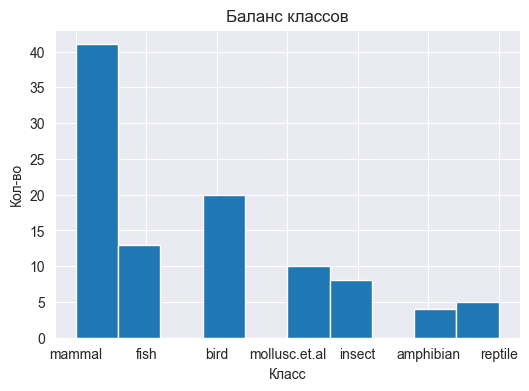

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["type"])
plt.title("Баланс классов")
plt.xlabel("Класс")
plt.ylabel("Кол-во")
plt.show()


# Задание 3
Разбить выборку на тренировочную и тестовую. Тренировочная для
обучения модели, тестовая для проверки ее качества.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["type"])
y = df["type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=271, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Тренировочная выборка:", X_train.shape)
print("Тестовая выборка:", X_test.shape)

Тренировочная выборка: (20, 16)
Тестовая выборка: (81, 16)


# Задание 4
Применить алгоритмы классификации: логистическая регрессия, SVM,
KNN. Построить матрицу ошибок по результатам работы моделей
(использовать confusion_matrix из sklearn.metrics).

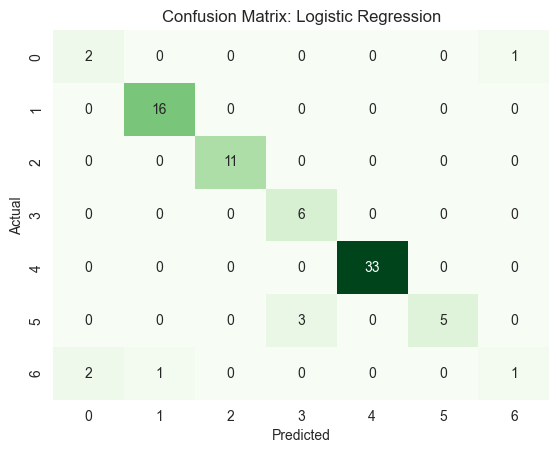

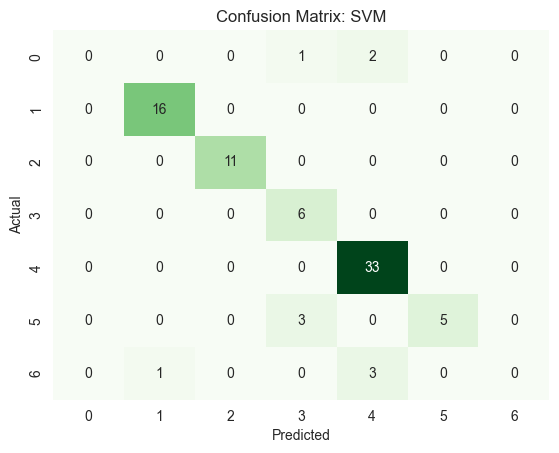

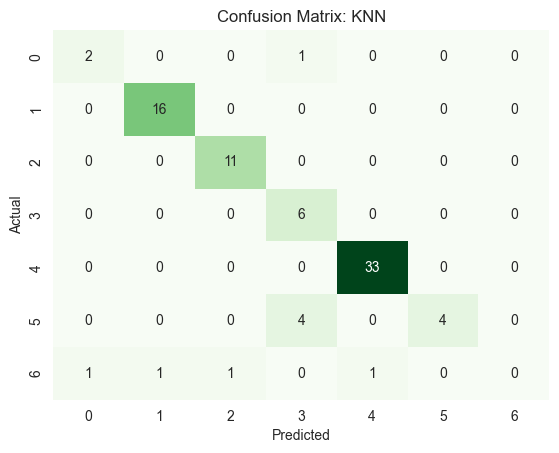

In [36]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

conf_mats = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, preds)
    conf_mats[name] = cm

    sns.heatmap(cm, annot=True, cmap='Greens', cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Задание 5
Сравнить результаты классификации, используя accuracy, precision,
recall и f1-меру (можно использовать classification_report из
sklearn.metrics). Сделать выводы.

In [37]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

comparison = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    comparison.append((name, acc, prec, rec, f1))

    print(f"{'='*20} {name} {'='*20}")
    print(classification_report(y_test, y_pred, zero_division=0))

comparison_df = pd.DataFrame(
    comparison,
    columns=['Model', 'Accuracy', 'Precision_macro', 'Recall_macro', 'F1_macro']
)

print("\nСравнение моделей:")
print(comparison_df)

==================== Logistic Regression ====================
               precision    recall  f1-score   support

    amphibian       0.50      0.67      0.57         3
         bird       0.94      1.00      0.97        16
         fish       1.00      1.00      1.00        11
       insect       0.67      1.00      0.80         6
       mammal       1.00      1.00      1.00        33
mollusc.et.al       1.00      0.62      0.77         8
      reptile       0.50      0.25      0.33         4

     accuracy                           0.91        81
    macro avg       0.80      0.79      0.78        81
 weighted avg       0.92      0.91      0.91        81

==================== SVM ====================
               precision    recall  f1-score   support

    amphibian       0.00      0.00      0.00         3
         bird       0.94      1.00      0.97        16
         fish       1.00      1.00      1.00        11
       insect       0.60      1.00      0.75         6
       m